In [1]:
import pandas as pd

In [2]:
df= pd.read_csv("aug_train.csv")

In [3]:
df.head()

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
3,33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0


In [4]:
df.columns.tolist()

['enrollee_id',
 'city',
 'city_development_index',
 'gender',
 'relevent_experience',
 'enrolled_university',
 'education_level',
 'major_discipline',
 'experience',
 'company_size',
 'company_type',
 'last_new_job',
 'training_hours',
 'target']

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19158 entries, 0 to 19157
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   enrollee_id             19158 non-null  int64  
 1   city                    19158 non-null  object 
 2   city_development_index  19158 non-null  float64
 3   gender                  14650 non-null  object 
 4   relevent_experience     19158 non-null  object 
 5   enrolled_university     18772 non-null  object 
 6   education_level         18698 non-null  object 
 7   major_discipline        16345 non-null  object 
 8   experience              19093 non-null  object 
 9   company_size            13220 non-null  object 
 10  company_type            13018 non-null  object 
 11  last_new_job            18735 non-null  object 
 12  training_hours          19158 non-null  int64  
 13  target                  19158 non-null  float64
dtypes: float64(2), int64(2), object(10)
me

In [6]:
df.isnull().sum()

enrollee_id                  0
city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2813
experience                  65
company_size              5938
company_type              6140
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [7]:
df["target"].value_counts()

target
0.0    14381
1.0     4777
Name: count, dtype: int64

# Preprocesssing

In [8]:
from preprocessing_1 import Preprocessing
pre_pross = Preprocessing(df)

In [9]:
temp=pre_pross.handle_nulls()
temp

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NS,not_specified,1,36,1.0
1,29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
2,11561,city_21,0.624,Not_specified,No relevent experience,Full time course,Graduate,STEM,5,NS,not_specified,never,83,0.0
3,33241,city_115,0.789,Not_specified,No relevent experience,none,Graduate,Business Degree,<1,NS,Pvt Ltd,never,52,1.0
4,666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19153,7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NS,not_specified,1,42,1.0
19154,31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NS,not_specified,4,52,1.0
19155,24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0
19156,5756,city_65,0.802,Male,Has relevent experience,no_enrollment,High School,Not_Specified,<1,500-999,Pvt Ltd,2,97,0.0


In [10]:
temp.isnull().sum()

enrollee_id               0
city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
target                    0
dtype: int64

In [11]:
pre_pross.mode

'>20'

In [ ]:
x=temp["last_new_job"].unique()
x

In [ ]:
temp["city","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job"]

In [ ]:
pre_pross.handle_imbalance()

In [ ]:
temp["city","gender","relevent_experience","enrolled_university","education_level","major_discipline","experience","company_size","company_type","last_new_job"]

In [ ]:
df = pre_pross.preprocess()

In [ ]:
df

In [ ]:
pre_pross.target_mean_feature[2][1]

In [ ]:
df.isnull().sum()

In [ ]:
df["target"].value_counts()

# Base Model Evaulation

In [ ]:
from baseModelScore import evaluate_models
metrics_df = evaluate_models(df)

In [ ]:
metrics_df

# Hyper Paramater Tuning 

In [ ]:
from hyper_param import hyperparam_models
gredsearchsv,optuna=hyperparam_models(df,"target")

In [ ]:
h_df=pd.concat([gredsearchsv,optuna],axis=0)
h_df

# Text evaluation and profession sumarry claffication  

In [5]:
import  pandas as pd 
df = pd.read_csv("aug_train.csv")

In [8]:
from text_class import text_model,classify_features


ImportError: cannot import name 'text_model' from 'text_class' (/workspaces/employeeRetentionPredection/text_class.py)

In [7]:
text_model(df, target_feature='target')

NameError: name 'text_model' is not defined

Epoch [1/78], Loss: 0.6938
Epoch [2/78], Loss: 0.6930
Epoch [3/78], Loss: 0.6925
Epoch [4/78], Loss: 0.6917
Epoch [5/78], Loss: 0.6908
Epoch [6/78], Loss: 0.6899
Epoch [7/78], Loss: 0.6891
Epoch [8/78], Loss: 0.6879
Epoch [9/78], Loss: 0.6867
Epoch [10/78], Loss: 0.6853
Epoch [11/78], Loss: 0.6835
Epoch [12/78], Loss: 0.6816
Epoch [13/78], Loss: 0.6793
Epoch [14/78], Loss: 0.6771
Epoch [15/78], Loss: 0.6744
Epoch [16/78], Loss: 0.6713
Epoch [17/78], Loss: 0.6679
Epoch [18/78], Loss: 0.6639
Epoch [19/78], Loss: 0.6601
Epoch [20/78], Loss: 0.6559
Epoch [21/78], Loss: 0.6507
Epoch [22/78], Loss: 0.6458
Epoch [23/78], Loss: 0.6404
Epoch [24/78], Loss: 0.6349
Epoch [25/78], Loss: 0.6278
Epoch [26/78], Loss: 0.6215
Epoch [27/78], Loss: 0.6144
Epoch [28/78], Loss: 0.6064
Epoch [29/78], Loss: 0.5982
Epoch [30/78], Loss: 0.5900
Epoch [31/78], Loss: 0.5815
Epoch [32/78], Loss: 0.5737
Epoch [33/78], Loss: 0.5642
Epoch [34/78], Loss: 0.5563
Epoch [35/78], Loss: 0.5459
Epoch [36/78], Loss: 0.5385
E

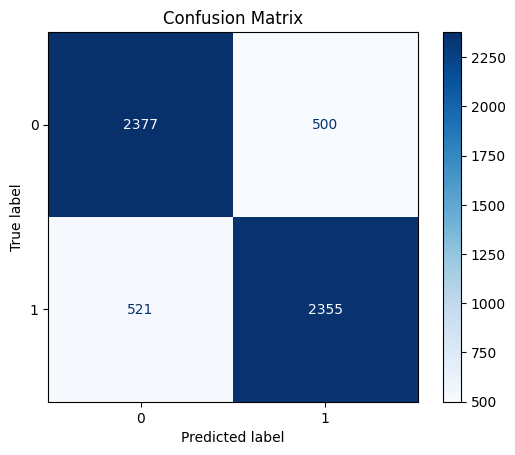

AttributeError: 'function' object has no attribute 'vectorizer'

In [9]:
# Example usage:
new_features = "A seasoned professional with a distinguished two-decade odyssey within the dynamic realm of STEM, currently contributing to the evolution of a mid-sized private enterprise ensconced within the vibrant metropolis of city_103. Fortified with a graduate degree and a rich tapestry of industry-specific acumen, I am poised to make substantial contributions to intricate initiatives and catalyze groundbreaking solutions."
print(f'The features are classified as: {classify_features(df,'target',new_features)}')


In [1]:
from text_class import ModelHandler

In [2]:
import pandas as pd 
df= pd.read_csv("aug_train.csv")

Epoch [10/78], Loss: 0.6850
Epoch [20/78], Loss: 0.6537
Epoch [30/78], Loss: 0.5835
Epoch [40/78], Loss: 0.4999
Epoch [50/78], Loss: 0.4594
Epoch [60/78], Loss: 0.4351
Epoch [70/78], Loss: 0.4245
Accuracy: 0.82
ROC-AUC: 0.89


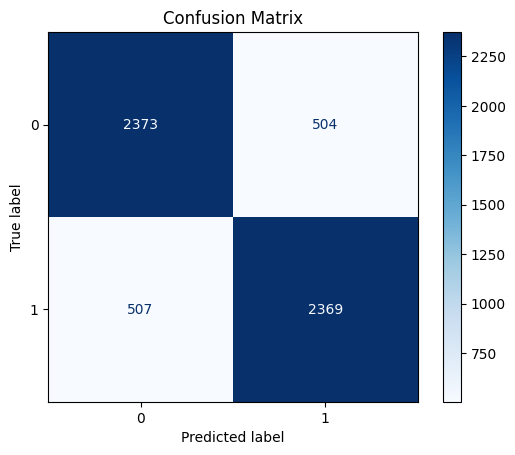

In [3]:

handler = ModelHandler()
handler.train_model(df, target='target')

In [4]:
handler.save_model()

In [5]:
result = handler.classify_features("A seasoned professional with a distinguished two-decade odyssey within the dynamic realm of STEM, currently contributing to the evolution of a mid-sized private enterprise ensconced within the vibrant metropolis of city_103. Fortified with a graduate degree and a rich tapestry of industry-specific acumen, I am poised to make substantial contributions to intricate initiatives and catalyze groundbreaking solutions.")
print(f'Predicted class: {result}')

Predicted class: 0
